<a href="https://colab.research.google.com/github/porygon-tech/ECO/blob/main/demos/tutorial_EVO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/porygon-tech/ECO

fatal: destination path 'ECO' already exists and is not an empty directory.


In [3]:
import sys
sys.path.insert(0,'/content/ECO')

In [4]:
import evo
import numpy as np
import matplotlib.pyplot as plt

# Setup
Let us create a population of 2000 individuals with 100 loci for a certain trait. This trait's phenotypic value will range from 500 to 600.

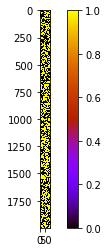

In [6]:
nloci = 100
ps = (500,500+nloci)
pop = evo.population(2000,nloci, skew= 0.5,phenoSpace=ps);pop.show()

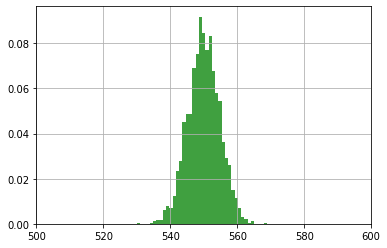

In [12]:
pop.hist(40)

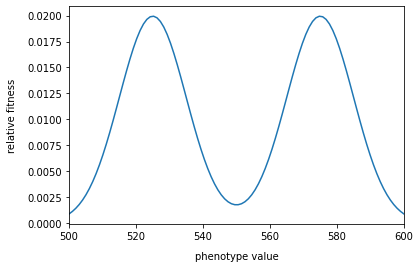

In [13]:
pop.showfitness()